<a href="https://colab.research.google.com/github/javiase/Grupo27-Practica1/blob/main/TrabajoFinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de herramientas

Para comenzar realizaremos todas las importaciones necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sympy import *

#decisiontrees
from sklearn import tree
from sklearn import metrics

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#traintest
from sklearn.model_selection import train_test_split

#crossval
from sklearn.model_selection import cross_val_score, KFold

# 1. Importacion modelo de datos y Analisis exploratorio de datos

## Implementar modelo de datos

Implementamos el modelo de datos


In [3]:
datos = pd.read_csv("disp_st27ns1.txt.bz2", compression="bz2",index_col=0)
#comp_df = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)

In [ ]:
pd.options.display.max_rows = 100
datos

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900


In [16]:
count = 0
datos['apcp_sf1_1']
ceros = (datos['apcp_sf1_1']==0).sum()
ceros

2534

Como se puede apreciar en la tabla la columna "uswrf_s1_1",  contiene 2534 ceros. Es más de la mitad, por lo que se procederá a eliminar dicha columna

In [ ]:
datos.drop(['uswrf_s1_1'], axis=1)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,192.516803,246.504475,250.123907,256.887859,252.522390,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,231.473054,205.821899,202.754549,190.833872,193.689280,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,210.473835,232.919646,234.298932,207.450058,201.529466,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,227.330324,231.098594,234.944027,247.745764,241.867405,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,229.641681,228.161205,229.680077,246.582735,245.473409,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,224.630457,244.348444,237.416203,184.462400,184.607586,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.591119,245.674612,249.425982,259.792969,256.932908,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,240.584692,227.978506,236.917554,268.096311,269.024766,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,268.409674,262.343628,256.254039,263.650323,268.711556,10.909091,46.181818,94.363636,61.727273,11154900


## Comprobar valores nulos

A continuacion comprobaremos si existen valores nulos en alguna de las columnas

In [ ]:
datos.isnull().sum()

apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
dlwrf_s1_1    0
dlwrf_s2_1    0
dlwrf_s3_1    0
dlwrf_s4_1    0
dlwrf_s5_1    0
dswrf_s1_1    0
dswrf_s2_1    0
dswrf_s3_1    0
dswrf_s4_1    0
dswrf_s5_1    0
pres_ms1_1    0
pres_ms2_1    0
pres_ms3_1    0
pres_ms4_1    0
pres_ms5_1    0
pwat_ea1_1    0
pwat_ea2_1    0
pwat_ea3_1    0
pwat_ea4_1    0
pwat_ea5_1    0
spfh_2m1_1    0
spfh_2m2_1    0
spfh_2m3_1    0
spfh_2m4_1    0
spfh_2m5_1    0
tcdc_ea1_1    0
tcdc_ea2_1    0
tcdc_ea3_1    0
tcdc_ea4_1    0
tcdc_ea5_1    0
tcolc_e1_1    0
tcolc_e2_1    0
tcolc_e3_1    0
tcolc_e4_1    0
tcolc_e5_1    0
tmax_2m1_1    0
tmax_2m2_1    0
tmax_2m3_1    0
tmax_2m4_1    0
tmax_2m5_1    0
tmin_2m1_1    0
tmin_2m2_1    0
tmin_2m3_1    0
tmin_2m4_1    0
tmin_2m5_1    0
tmp_2m_1_1    0
tmp_2m_2_1    0
tmp_2m_3_1    0
tmp_2m_4_1    0
tmp_2m_5_1    0
tmp_sfc1_1    0
tmp_sfc2_1    0
tmp_sfc3_1    0
tmp_sfc4_1    0
tmp_sfc5_1    0
ulwrf_s1_1    0
ulwrf_s2_1    0
ulwrf_s3

## Comprobar filas duplicadas

Vamos a comprobar si hay filas duplicadas:




In [ ]:
datos.duplicated()

V1       False
V2       False
V3       False
V4       False
V5       False
         ...  
V4376    False
V4377    False
V4378    False
V4379    False
V4380    False
Length: 4380, dtype: bool

Se puede ver, que no hay ninguna fila duplicada, lo cual es buena señal

## Comprobar correlacion entre las variables y la salida, y entre las variables entre si

A continuación construimos la matriz de correlación para ver qué relevante es cada variable en la salida y para comprobar que dos variables no tengan un comportamiento muy similar(ante lo cual se eliminaría una de ellas) y con su mapa de calor, para verla mejor


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,1.000000,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,0.601748,1.000000,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,0.543781,0.944655,1.000000,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,0.277655,0.403267,0.549341,1.000000,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,0.262666,0.375560,0.485724,0.898837,1.000000,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uswrf_s2_1,-0.188936,-0.220824,-0.223966,-0.137082,-0.145067,0.377124,0.367840,0.423130,0.538780,0.561208,...,0.616894,0.630775,0.549095,0.546359,0.613877,1.000000,0.880281,0.570918,0.721518,0.836513
uswrf_s3_1,-0.244583,-0.316501,-0.342563,-0.252470,-0.256692,0.120764,0.086127,0.129628,0.250681,0.279531,...,0.568659,0.607689,0.564648,0.545875,0.451408,0.880281,1.000000,0.849519,0.889140,0.785239
uswrf_s4_1,-0.158497,-0.246168,-0.298344,-0.312784,-0.320720,-0.054888,-0.094005,-0.079860,-0.039036,-0.014985,...,0.365642,0.419717,0.498197,0.484584,0.241420,0.570918,0.849519,1.000000,0.955342,0.594700
uswrf_s5_1,-0.130785,-0.207139,-0.253546,-0.281925,-0.299890,0.117347,0.087518,0.107742,0.149881,0.169544,...,0.430647,0.485363,0.569784,0.578729,0.363594,0.721518,0.889140,0.955342,1.000000,0.727169


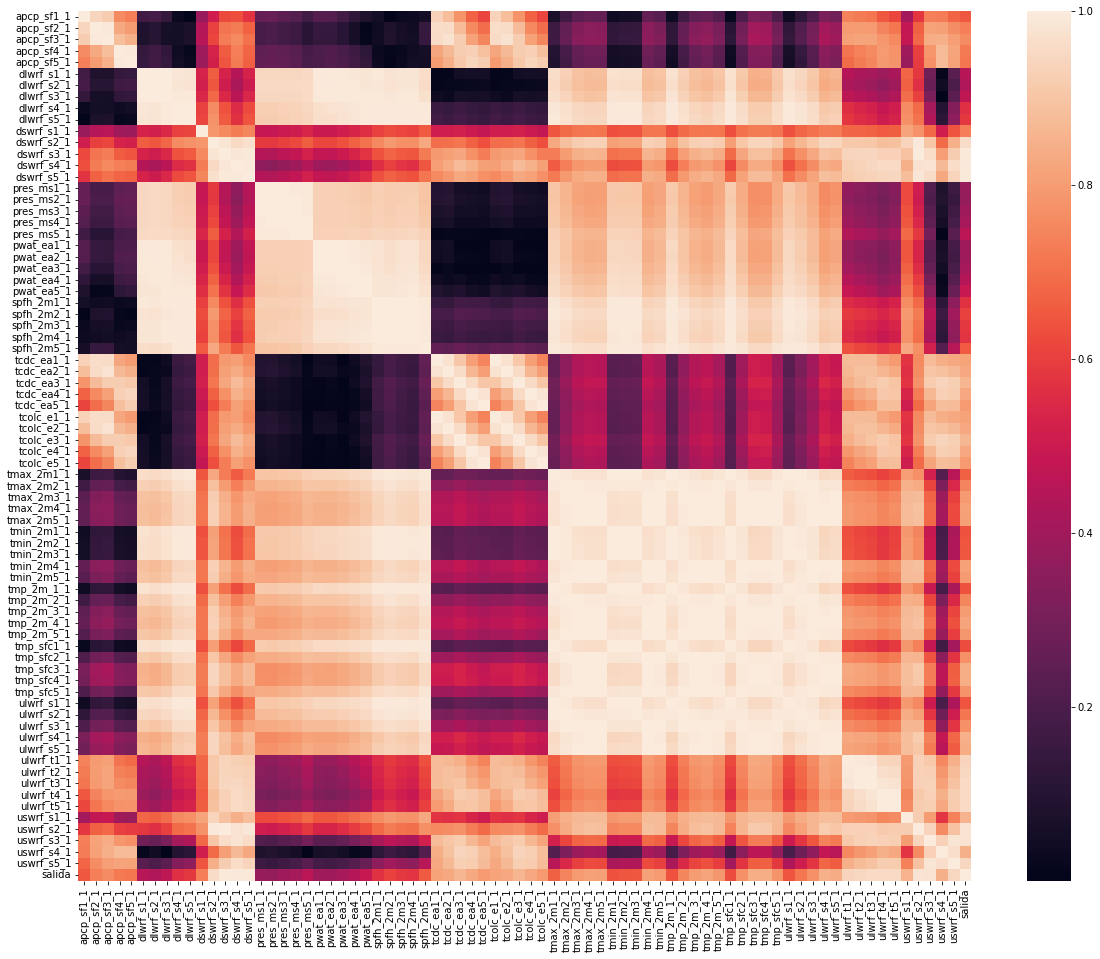

In [18]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.corr().abs())
correlacion

Limitamos la matriz al triangulo superior 

In [19]:
upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))
upper

<ipython-input-19-dada363a1d0c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,NaN,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,NaN,NaN,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,NaN,NaN,NaN,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,NaN,NaN,NaN,NaN,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,NaN,NaN,NaN,NaN,NaN,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uswrf_s2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.880281,0.570918,0.721518,0.836513
uswrf_s3_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849519,0.889140,0.785239
uswrf_s4_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955342,0.594700
uswrf_s5_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727169


Vamos a crear una matriz de correlacion con las columnas cuya correlacion sea mayor de 0,95

In [27]:
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
to_drop.corr()



AttributeError: ignored

Vamos a ver cuales tienen mejor o peor correlacion con la variable de salida